![aula18_capa.png](./figuras/aula18_capa.png)

In [35]:
# !pip install nltk
# !pip install gensim

## Modelos de Representação de Palavras

### 1. Word2Vec
- **Definição**: Algoritmo que representa palavras como vetores em um espaço contínuo.
- **Estratégias**:
  - CBOW (Continuous Bag of Words): Prediz a palavra com base no contexto.
  - Skip-gram: Prediz o contexto com base na palavra central.


**Frase de Exemplo**

Frase: ```O gato gosta de peixe```

![aula18_cbow_skip.png](./figuras/aula18_cbow_skip.png)

- CBOW: Mais eficiente em dados pequenos. Foca no contexto para prever a palavra central.

- Skip-Gram: Funciona melhor em grandes conjuntos de dados. Captura relações semânticas mais complexas ao prever o contexto usando a palavra central.

In [78]:
from gensim.models import Word2Vec

# Exemplo de treinamento com Word2Vec
sentences = [["gato", "adora", "peixe"], ["cachorro", "late", "para", "gatinho"],  ["rei", "governa", "reino"],
    ["mulher", "vive", "no", "reino"],
    ["homem", "ajuda", "no", "governo"]]

# Modelo CBOW (sg=0)
model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=0, workers=4)

# Modelo Skip-Gram (sg=1)
#model = Word2Vec(sentences, vector_size=50, window=3, min_count=1,sg=1, workers=4)

# Acessar vetor de uma palavra
vector = model.wv["late"]
print("Vetor da palavra 'gato':", vector)

Vetor da palavra 'gato': [ 0.005486   -0.016719    0.01571279  0.0170703  -0.01917363  0.00489247
  0.01981355 -0.01533167 -0.01393766 -0.01547715  0.01679156 -0.00136368
  0.01828782 -0.01632169  0.00748585  0.0052674   0.00148326  0.00465364
 -0.01494053 -0.01871921  0.00470619  0.01229782  0.01597603  0.01147583
 -0.00155757  0.01661253 -0.01867324  0.00680927  0.00053412  0.00771772
  0.01477519 -0.01345498  0.01116832 -0.0190494  -0.00160906 -0.01737562
 -0.01019605  0.01858218 -0.00371495  0.00582818  0.01814796  0.01787519
 -0.01642123 -0.00602607  0.01977482  0.01020862 -0.00317671 -0.01738286
  0.00592334 -0.01335371]


1.1 Treinamento com Parâmetros Personalizados


In [79]:
# Construir o vocabulário
model.build_vocab(sentences)

# Treinar o modelo
model.train(sentences, total_examples=model.corpus_count, epochs=1000)

# Acessar vetor de uma palavra
vector = model.wv["gato"]
print("Vetor da palavra 'gato':", vector)

Vetor da palavra 'gato': [-0.00066461 -0.00012106  0.01007604  0.01772279 -0.02013941 -0.01504357
  0.01445466  0.01845654 -0.01282796 -0.00928387  0.01625643 -0.0037476
 -0.00769118  0.01316633 -0.00972467 -0.00321594  0.00959073  0.00473818
 -0.01993998 -0.02050222  0.01448102  0.01044507  0.01710199  0.0029958
  0.01260991 -0.00619475 -0.00097859  0.01376643 -0.0161076  -0.00798778
 -0.01502496 -0.00327962  0.01809991 -0.01688035 -0.00644165 -0.004882
  0.01832774 -0.01367588 -0.00164272 -0.01047571 -0.01772742  0.00929226
 -0.01705362 -0.01042047  0.00356706  0.00087586 -0.01482099  0.01721099
  0.00981849  0.01833477]


1.2. Busca de Palavras Semelhantes
Utilizar a função most_similar() para encontrar palavras com significado similar.

In [80]:
similar_words = model.wv.most_similar("gato", topn=5)
print("Palavras semelhantes a 'gato':", similar_words)

Palavras semelhantes a 'gato': [('ajuda', 0.30082690715789795), ('vive', 0.2511043846607208), ('homem', 0.24055106937885284), ('reino', 0.20823067426681519), ('peixe', 0.1972850263118744)]


1.3. Operações Aritméticas no Espaço de Palavras

In [81]:
# Exemplo de analogia: Rei - Homem + Mulher = ?
analogia = model.wv.most_similar(positive=["rei", "mulher"], negative=["homem"], topn=1)
print("Resultado da analogia (Rei - Homem + Mulher):", analogia)

Resultado da analogia (Rei - Homem + Mulher): [('governa', 0.37330472469329834)]


1.4. Salvando e Carregando Modelos

In [82]:
# Salvar o modelo
model.save("word2vec.model")

# Carregar o modelo
loaded_model = Word2Vec.load("word2vec.model")
print("Vetor da palavra 'gato' no modelo carregado:", loaded_model.wv["gato"])


Vetor da palavra 'gato' no modelo carregado: [-0.00066461 -0.00012106  0.01007604  0.01772279 -0.02013941 -0.01504357
  0.01445466  0.01845654 -0.01282796 -0.00928387  0.01625643 -0.0037476
 -0.00769118  0.01316633 -0.00972467 -0.00321594  0.00959073  0.00473818
 -0.01993998 -0.02050222  0.01448102  0.01044507  0.01710199  0.0029958
  0.01260991 -0.00619475 -0.00097859  0.01376643 -0.0161076  -0.00798778
 -0.01502496 -0.00327962  0.01809991 -0.01688035 -0.00644165 -0.004882
  0.01832774 -0.01367588 -0.00164272 -0.01047571 -0.01772742  0.00929226
 -0.01705362 -0.01042047  0.00356706  0.00087586 -0.01482099  0.01721099
  0.00981849  0.01833477]


1.5. O Vocabulário do Modelo

Explorar o vocabulário gerado e estatísticas do modelo.

In [83]:
# Lista de palavras no vocabulário
vocab = list(model.wv.key_to_index.keys())
print("Tamanho do vocabulário:", len(vocab))
print("Palavras no vocabulário:", vocab[:10])


Tamanho do vocabulário: 16
Palavras no vocabulário: ['no', 'reino', 'ajuda', 'governo', 'homem', 'vive', 'mulher', 'governa', 'rei', 'gatinho']


blz, beleza, belez, bleza (independentes)
(agrupar em uma única palavra): 'beleza'

'beleza': {'blz', 'beleza', 'belez', 'bleza'}

1.6. Similaridade entre Palavras

Medir a similaridade semântica entre duas palavras.

In [89]:
similarity = model.wv.similarity("rei", "reino")
print("Similaridade entre 'gato' e 'cachorro':", similarity)

similarity = model.wv.similarity("gato", "gatinho")
print("Similaridade entre 'gato' e 'gatinho':", similarity)

Similaridade entre 'gato' e 'cachorro': 0.12971388
Similaridade entre 'gato' e 'gatinho': 0.07045418


1.7. Análise de Outliers

In [91]:
outlier = model.wv.doesnt_match(["gato", "cachorro", "peixe", "banana"])
print("Palavra fora do contexto:", outlier)

Palavra fora do contexto: cachorro


1.8. Preprocessamento de Dados

Incluir a etapa de preprocessamento das sentenças antes do treinamento.

In [93]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Baixar stopwords e tokenizer do NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Lista de stopwords em português
stop_words = set(stopwords.words("portuguese"))

def preprocess_text(text):
    # Transformar em minúsculas
    text = text.lower()
    # Remover caracteres especiais e números
    text = re.sub(r"[^a-záéíóúãõâêîôûç\s]", "", text)
    # Tokenizar o texto
    tokens = word_tokenize(text)
    # Remover stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Exemplo de uso
sentences = ["O gato adora peixe fresco!", "Cachorros são animais muito leais.", "A aluna tirou boa nota"]
processed_sentences = [preprocess_text(sentence) for sentence in sentences]
print("Sentenças processadas:", processed_sentences)


Sentenças processadas: [['gato', 'adora', 'peixe', 'fresco'], ['cachorros', 'animais', 'leais'], ['aluna', 'tirou', 'boa', 'nota']]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hericson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/hericson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/hericson/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


1.9. Transfer Learning com Word2Vec

Usar modelos pré-treinados para expandir a análise.

In [45]:
from gensim.models import KeyedVectors

# Carregar um modelo pré-treinado (como o Word2Vec do Google News)
# baixar em https://drive.usercontent.google.com/download?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download&authuser=0

pretrained_model = KeyedVectors.load_word2vec_format("datasets/GoogleNews-vectors-negative300.bin.gz", binary=True)
print("Vetor da palavra 'hombre':", pretrained_model["hombre"])

Vetor da palavra 'hombre': [-0.11572266 -0.11523438  0.18359375  0.38671875 -0.03710938  0.18847656
 -0.328125    0.1484375   0.02233887  0.09375     0.18066406 -0.40039062
 -0.23730469 -0.07373047  0.08740234  0.36132812  0.10644531  0.53125
  0.29882812 -0.12988281 -0.08984375  0.11865234  0.22558594  0.07421875
 -0.00946045 -0.359375   -0.44921875 -0.21972656 -0.01434326 -0.00227356
  0.30664062  0.31054688  0.18457031  0.19042969 -0.03491211  0.37304688
  0.12890625  0.09814453  0.16210938 -0.06347656  0.07470703 -0.30859375
  0.421875    0.20703125  0.06738281 -0.04541016 -0.10986328 -0.01269531
 -0.125       0.2890625  -0.26757812  0.19921875  0.15429688 -0.13671875
  0.08447266  0.19042969 -0.00280762  0.07275391  0.07763672  0.14941406
 -0.0546875   0.125      -0.19628906 -0.012146   -0.14550781 -0.04541016
 -0.08886719 -0.27148438  0.12695312  0.09472656  0.359375    0.33007812
 -0.25        0.11914062 -0.07080078  0.19628906  0.11230469  0.23730469
 -0.30664062 -0.15234375  0

In [107]:
similar_words2 = pretrained_model.most_similar("strawberry", topn=5)
print("Palavras semelhantes a 'hombre':", similar_words2)

Palavras semelhantes a 'hombre': [('strawberries', 0.7941855192184448), ('blueberry', 0.7661275863647461), ('berry', 0.7010524272918701), ('tomato', 0.6888598203659058), ('peaches', 0.6870250701904297)]


---

### 2.GloVe

O **GloVe (Global Vectors for Word Representation)** é um modelo de aprendizado que gera representações vetoriais para palavras com base em uma matriz de coocorrência de palavras em um grande corpus de texto.

Entendendo a Coocorrência:

Frase:

```O gato gosta de peixe```

![aula18_coocorr%C3%AAncia.png](./figuras/aula18_coocorr%C3%AAncia.png)

O GloVe utiliza essa matriz de coocorrência para aprender vetores densos para cada palavra. Ele tenta ajustar os vetores para que as relações semânticas sejam capturadas, como:

Vetor("gato") deve estar mais próximo de Vetor("peixe") do que de Vetor("carro").

Vetores podem ser combinados para capturar analogias, como:

- Vetor("rei") −> Vetor("homem") + Vetor("mulher") ≈ Vetor("rainha")



### 2.1. Baixar e Carregar o Modelo GloVe

Vamos baixar um modelo GloVe pré-treinado e o convertendo para um formato compatível com a biblioteca `gensim`.

In [138]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Converter o formato GloVe para Word2Vec
# baixar em : http://nlp.stanford.edu/data/glove.6B.zip
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_file = "datasets/glove.6B (2)/glove.6B.100d.txt"
word2vec_output_file = "datasets/glove.6B.100d.word2vec.txt"
glove2word2vec(glove_file, word2vec_output_file)

# Carregar o modelo
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

/tmp/ipykernel_93588/2686739773.py:9: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_output_file)


### 2.1 Encontrar Palavras Semelhantes

In [110]:
# Encontrar palavras semelhantes
similar_words = model.most_similar("girlfriend", topn=3)
print("Palavras semelhantes a 'king':", similar_words)

Palavras semelhantes a 'king': [('boyfriend', 0.9419270157814026), ('fiancee', 0.8946628570556641), ('fiance', 0.8751725554466248)]


### 2.2 Calcular Similaridade entre Palavras

In [115]:
# Similaridade entre palavras
similarity = model.similarity("big", "large")
print("Similaridade entre 'woman' e 'man':", similarity)

Similaridade entre 'woman' e 'man': 0.6746013


### 2.3 Operações de Vetores

In [125]:
analogia = model.most_similar(positive=["horse", "farm"], negative=["fruit"], topn=1)
print("Resultado da analogia (King - Man + Woman):", analogia)

Resultado da analogia (King - Man + Woman): [('horses', 0.6599798202514648)]


In [123]:
analogia = model.most_similar(positive=["flower", "green"])
analogia

[('flowers', 0.8246087431907654),
 ('red', 0.8242772221565247),
 ('tree', 0.8163017630577087),
 ('yellow', 0.8078889846801758),
 ('purple', 0.7923315167427063),
 ('blue', 0.7852816581726074),
 ('pink', 0.782580554485321),
 ('white', 0.7795533537864685),
 ('wood', 0.7765533328056335),
 ('bright', 0.7696632742881775)]

### 2.4 Palavras Fora do Contexto

In [128]:
# Identificar palavra fora do contexto
outlier = model.doesnt_match(["blue", "green", "yellow", "small"])
print("Palavra fora do contexto:", outlier)

Palavra fora do contexto: small


### 2.5 Função para Representar Sentenças como Vetores

In [52]:
import numpy as np

def sentence_to_vector(sentence, model):
    words = sentence.lower().split()
    vectors = [model[word] for word in words if word in model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

### 2.6 Comparação de Sentenças

In [129]:
# Sentenças de exemplo
sentence1 = "The king is strong"
sentence2 = "The queen is powerful"

# Calcular os vetores
vector1 = sentence_to_vector(sentence1, model)
vector2 = sentence_to_vector(sentence2, model)

# Similaridade entre sentenças
from numpy.linalg import norm
similarity = np.dot(vector1, vector2) / (norm(vector1) * norm(vector2))
print(f"Similaridade entre as sentenças: {similarity:.4f}")

Similaridade entre as sentenças: 0.9657


**Obs: experimente usar outros modelos GloVe (100, 200 ou 300 dimensões) para verificar como a dimensionalidade impacta os resultados!**

---

### 3.  Aplicação prática de Redes Neurais Recorrentes (RNN) com Long Short-Term Memory (LSTM) para análise de sentimentos

### 3.1 Importando as bibliotecas

In [54]:
#pip install tensorflow

In [131]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk
import os
import tarfile
import re

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Baixar stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hericson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 3.2 Preparando o dataset

https://ai.stanford.edu/~amaas/data/sentiment/

Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011).

Este é um conjunto de dados para classificação binária de sentimentos, contendo substancialmente mais dados do que conjuntos de dados de referência anteriores. Fornecemos um conjunto de 25.000 resenhas de filmes altamente polarizadas para treinamento e 25.000 para teste. Há também dados adicionais não rotulados disponíveis para uso. São fornecidos os formatos de texto bruto e de "bag of words" já processados.

In [133]:
# Caminhos para os dados
# Baixar em: https://ai.stanford.edu/~amaas/data/sentiment/
train_pos_dir = "datasets/aclImdb_v1/aclImdb/train/pos"
train_neg_dir = "datasets/aclImdb_v1/aclImdb/train/neg"

# Função para carregar textos e rótulos
def load_imdb_data(pos_dir, neg_dir):
    texts, labels = [], []
    for file in os.listdir(pos_dir):
        with open(os.path.join(pos_dir, file), encoding="utf-8") as f:
            texts.append(f.read())
            labels.append(1)  # 1 para avaliações positivas
    for file in os.listdir(neg_dir):
        with open(os.path.join(neg_dir, file), encoding="utf-8") as f:
            texts.append(f.read())
            labels.append(0)  # 0 para avaliações negativas
    return texts, labels

# Carregar os dados
texts, labels = load_imdb_data(train_pos_dir, train_neg_dir)
print(texts[0])
print(labels[0])

This is a story about Shin-ae, who moves to Milyang from Seoul with her young son Jun to start over after the accidental death of her husband. Her husband was born here, and she is opening up a piano school, but also has ambitions to own some land with the insurance money she received from the death. If that is what the film was about, it probably would have been like a Hollywood film, with her falling for some local guy and being happy with her son in their new home. But, this is not Hollywood. Her son gets kidnapped and murdered, ostensibly because it is known she has cash from the settlement. The grief process, attempts at moving on, attempts to clear her conscience of guilt, are all done admirably, and the lead actress is superb. The only caveat, and it has to be stated, is that this is a depressing film. You have to know that going in. You want Shin-ae to go through her grief and find some measure of happiness. Again, this is not Hollywood, it is Korea and in Korean cinema, especi

In [137]:
texts[100], labels[100]

("mahatma Gandhi, the father of the nation in his quest for India's freedom struggle ignored his own family and son, this movie is about his son Hiralal who feels neglected because of mahatma Gandhi's service to the society. The movie starts off in South Africa where Mahatma Gandhi works as a barrister and fighting the cause of India's freedom against the British. Hirarala arrives in South Africa to help his dad who is a barrister, since gandhi was involved in the freedom struggle, he wanted his wife and children to join in too as a service to the society and as a result hirarlal does not get a chance to complete his education and fails his exams, he gets married to his love gulab (bhoomika Chawla) against his father's wishes. Hiralal has ambitions to travel to england and become a barrister just like his dad but his own dad refuses to grant him a scholarship offered to his family by a businessman and instead gives it away to another person saying that the scholarship should not be lim

#### Dividindo os dados

Dividimos os dados em conjuntos de treinamento e teste.

In [139]:
# Dividir em conjunto de treino e teste
texts_train, texts_test, labels_train, labels_test = train_test_split(
    texts, labels, test_size=0.3, random_state=42
)

### 3.3 Pré-processamento de Texto

Remover stopwords, tokenizar e criar sequências de entrada.

In [140]:

nltk.download("stopwords")

# Remover stopwords e limpar o texto
stop_words = set(stopwords.words("english"))  # Dataset IMDB está em inglês

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)  # Remover caracteres especiais
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

# Pré-processar os textos
texts_train = [preprocess_text(text) for text in texts_train]
texts_test = [preprocess_text(text) for text in texts_test]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hericson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 3.4 Tokenização e Sequencialização

In [145]:
# Tokenizar os textos
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts_train)

# Converter os textos para sequências
X_train = tokenizer.texts_to_sequences(texts_train)
X_test = tokenizer.texts_to_sequences(texts_test)

# # Padronizar os comprimentos das sequências
max_len = 100  # Ajuste baseado no dataset
X_train = pad_sequences(X_train, maxlen=max_len, padding="post")
X_test = pad_sequences(X_test, maxlen=max_len, padding="post")

# Converter rótulos para arrays NumPy
y_train = np.array(labels_train)
y_test = np.array(labels_test)


In [148]:
X_train

array([[ 545,   45,  360, ...,    0,    0,    0],
       [  55, 1440,  525, ...,    0,    0,    0],
       [ 839,  252,  845, ...,  112, 4421,   74],
       ...,
       [   7,   41,  299, ...,    0,    0,    0],
       [1277,   84,  272, ...,    0,    0,    0],
       [1969, 1828,  587, ...,   30,   53,  233]], dtype=int32)

### Predição em um novo review?

rev = "Que filme legal, gostei demais, ótimos atores"

#### Objetivo?

Prever se o review é bom ou ruim

# Qual a primeira etapa?

1 - Pré-processar - remover stopwords, remover caracteres inválidos, números

2 - Tokenizar (Separar as palavras relevantes em tokens)

3 - Codificar o texto em formato numérico

4 - Realizar Predições

In [168]:
new_reviews = ["An incredible film, I loved the ending"]
new_reviews = [preprocess_text(review) for review in new_reviews]
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_X = pad_sequences(new_sequences, maxlen=max_len, padding="post")
new_X



array([[917,   3, 328, 180,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int32)

In [169]:
y_pred = (modelRNN.predict(new_X) > 0.5).astype("int32"), modelRNN.predict(new_X)  # Converte previsões para 0 ou 1
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


(array([[0]], dtype=int32), array([[0.47223896]], dtype=float32))

### 3.5 Construindo o Modelo com RNN e Treinando

In [149]:
# Criar o modelo
modelRNN = Sequential([
    Embedding(input_dim=5000, output_dim=64),  # Camada de Embedding
    SimpleRNN(128, return_sequences=False),  # Camada RNN
    Dropout(0.5),  # Regularização
    Dense(1, activation="sigmoid")  # Camada de saída para classificação binária
])

# Compilar o modelo
modelRNN.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


modelRNN.fit(X_train, y_train,epochs=10,batch_size=32,validation_data=(X_test, y_test),verbose=1)


# Avaliar no conjunto de teste
loss, accuracy = modelRNN.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Fazer previsões em novas frases
new_reviews = ["The movie was fantastic! I loved it.", "I hated the film. It was terrible."]
new_reviews = [preprocess_text(review) for review in new_reviews]
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_X = pad_sequences(new_sequences, maxlen=max_len, padding="post")

# Previsões
predictions = modelRNN.predict(new_X)
for review, pred in zip(new_reviews, predictions):
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"Review: {review} | Sentiment: {sentiment}")




Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.5002 - loss: 0.7350 - val_accuracy: 0.5109 - val_loss: 0.6955
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.5056 - loss: 0.7164 - val_accuracy: 0.5008 - val_loss: 0.6935
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.5050 - loss: 0.6997 - val_accuracy: 0.5037 - val_loss: 0.6930
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.5048 - loss: 0.6971 - val_accuracy: 0.4983 - val_loss: 0.6949
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.5052 - loss: 0.6964 - val_accuracy: 0.5013 - val_loss: 0.6952
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.5000 - loss: 0.6973 - val_accuracy: 0.5023 - val_loss: 0.6956
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.5069 - loss: 0.6969 - val_accuracy: 0.4888 - val_loss: 0.6951
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.5137 - loss: 0.6957 - 

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


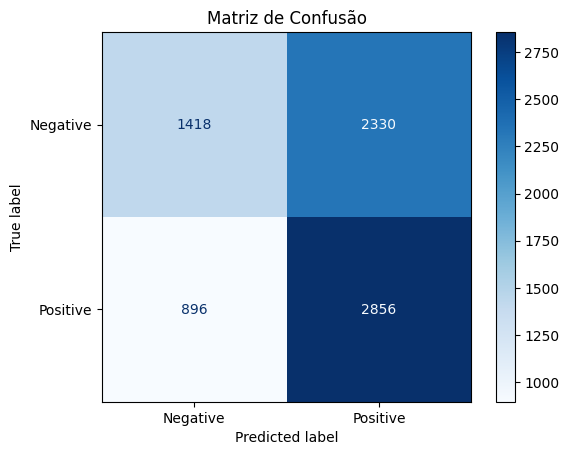

In [61]:
# Fazer previsões no conjunto de teste
y_pred = (modelRNN.predict(X_test) > 0.5).astype("int32")  # Converte previsões para 0 ou 1

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

### 3.6 Construindo o Modelo com LSTM e Treinando

Criar uma arquitetura LSTM para análise de sentimentos.

In [62]:

# Criar o modelo
model = Sequential([
    Embedding(input_dim=5000, output_dim=64),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

# Compilar o modelo
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Treinar o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.5446 - loss: 0.6829 - val_accuracy: 0.5847 - val_loss: 0.6682
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 27s 50ms/step - accuracy: 0.6811 - loss: 0.6192 - val_accuracy: 0.5320 - val_loss: 0.6970
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.6783 - loss: 0.5760 - val_accuracy: 0.8300 - val_loss: 0.4130
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - accuracy: 0.8612 - loss: 0.3521 - val_accuracy: 0.8583 - val_loss: 0.3415
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.8985 - loss: 0.2781 - val_accuracy: 0.8629 - val_loss: 0.3380
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.9328 - loss: 0.1995 - val_accuracy: 0.8624 - val_loss: 0.3505
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.9471 - loss: 0.1692 - val_accuracy: 0.8604 - val_loss: 0.3910
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.9638 - loss: 0.1314 - 

### 3.6 Avaliando o modelo e realizando testes

In [63]:
# Avaliar no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Testar o modelo em novas avaliações
new_reviews = ["The movie was fantastic! I loved it.", "I hated the film. It was terrible."]
new_reviews = [preprocess_text(review) for review in new_reviews]
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_X = pad_sequences(new_sequences, maxlen=max_len, padding="post")

# Fazer previsões
predictions = model.predict(new_X)
for review, pred in zip(new_reviews, predictions):
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"Review: {review} | Sentiment: {sentiment}")


235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8493 - loss: 0.5014
Loss: 0.4714, Accuracy: 0.8561
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Review: movie fantastic loved | Sentiment: Positive
Review: hated film terrible | Sentiment: Negative


235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


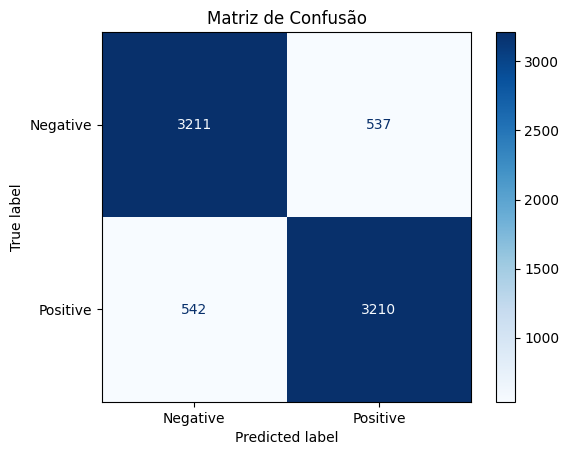

In [64]:
# Fazer previsões no conjunto de teste
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Converte previsões para 0 ou 1

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

---

## Por que LSTM tende a ser melhor do que RNN simples no problema de análise de sentimentos com o dataset IMDB?

## 1. Problemas das RNNs Simples
As **RNNs simples** sofrem com algumas limitações fundamentais:

### 1.1 Gradiente Desaparecendo ou Explodindo
- RNNs usam a propagação do gradiente para ajustar os pesos em cada iteração.
- Em sequências longas, os gradientes podem se tornar muito pequenos (**desaparecer**) ou muito grandes (**explodir**), o que dificulta o aprendizado eficiente.
- Isso faz com que RNNs tenham dificuldades em capturar dependências de longo prazo entre palavras.

### 1.2 Memória de Curto Prazo
- As RNNs simples têm dificuldade para lembrar informações de etapas muito anteriores na sequência.
- Por exemplo, em uma frase longa, uma RNN simples pode esquecer informações importantes do início da frase que influenciam o sentimento geral.

---

## 2. Vantagens do LSTM
Os LSTMs foram projetados para resolver os problemas mencionados acima, e isso os torna mais eficazes em tarefas como análise de sentimentos, especialmente com o dataset IMDB, que possui textos longos e complexos.

### 2.1 Estrutura Interna do LSTM
O LSTM introduz três tipos de **portas** que controlam o fluxo de informações:

1. **Porta de Esquecimento**: Decide quais informações devem ser descartadas da memória.
2. **Porta de Entrada**: Determina quais novas informações devem ser armazenadas na memória.
3. **Porta de Saída**: Decide quais informações da memória serão usadas para calcular a saída.

Essas portas permitem que o LSTM:
- Retenha informações importantes por longos períodos.
- Esqueça informações irrelevantes de forma controlada.

### 2.2 Captura de Dependências de Longo Prazo
- O LSTM consegue aprender dependências de palavras que estão distantes na sequência.
- Por exemplo, na frase:
  > "Embora o início tenha sido lento, o filme foi incrível e emocionante no final."
  - O sentimento positivo ("incrível e emocionante") depende da parte final da frase, mas uma RNN simples pode esquecer o início e fazer uma classificação incorreta.

### 2.3 Robustez para Textos Longos
- O dataset IMDB contém resenhas de filmes que podem ser bastante longas.
- O LSTM consegue processar essas sequências maiores sem perder a conexão semântica entre as palavras.

---

## 3. Resultados Práticos no Dataset IMDB

### 3.1 Precisão Maior
Estudos mostram que modelos baseados em LSTM frequentemente superam RNNs simples no dataset IMDB, com diferenças significativas de precisão. Isso ocorre porque os LSTMs:
- Classificam corretamente textos longos com nuances complexas de sentimentos.
- Fazem uso eficiente de informações distribuídas ao longo da sequência.

### 3.2 Menor Overfitting
- Com técnicas como **Dropout**, os LSTMs conseguem generalizar melhor em conjuntos de teste.
- As RNNs simples tendem a memorizar padrões locais e sofrem mais com overfitting.

---

## 4. Quando Usar LSTM ao Invés de RNN
Use LSTM nos seguintes casos:
- Sequências longas (ex.: análises de sentimentos, traduções automáticas, séries temporais).
- Dependências de longo prazo entre elementos da sequência.
- Tarefas onde a ordem e o contexto das palavras são cruciais para o entendimento.

RNNs simples podem ser suficientes para:
- Sequências curtas com padrões locais simples.
- Cenários onde o custo computacional é uma preocupação.

---

## Resumo
- O LSTM resolve problemas de curto prazo e gradientes desaparecendo em RNNs simples.
- Sua estrutura de portas é especialmente útil para capturar dependências de longo prazo em textos, como os do dataset IMDB.
- Em problemas de análise de sentimentos com textos longos e complexos, os LSTMs são mais robustos, eficazes e produzem melhores resultados do que RNNs simples.


---